In [2]:
import numpy as np
import pandas as pd

from keras.layers import Layer, Dense
from keras import initializers
from keras import backend as K
from keras.models import Sequential

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
class RBFLayer(Layer):
    def __init__(self, output_dim, normalized=True, **kwargs):
        self.output_dim = output_dim
        self.normalized = normalized
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(RBFLayer, self).build(input_shape)
        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=initializers.RandomUniform(0.0, 1.0),
                                       trainable=True)
        self.bias = self.add_weight(name='bias',
                                    shape=(self.output_dim, ),
                                    initializer=initializers.constant(1.0),
                                    trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=initializers.constant(1.0),
                                     trainable=True)

    def call(self, inputs, **kwargs):
        c = K.expand_dims(self.centers, axis=1)
        h = K.transpose(c - inputs)
        res = K.exp(self.bias - self.betas * K.sum(h ** 2, axis=0))
        if self.normalized:
            return res / K.expand_dims(K.sum(res, axis=1), axis=1)
        else:
            return res

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.output_dim

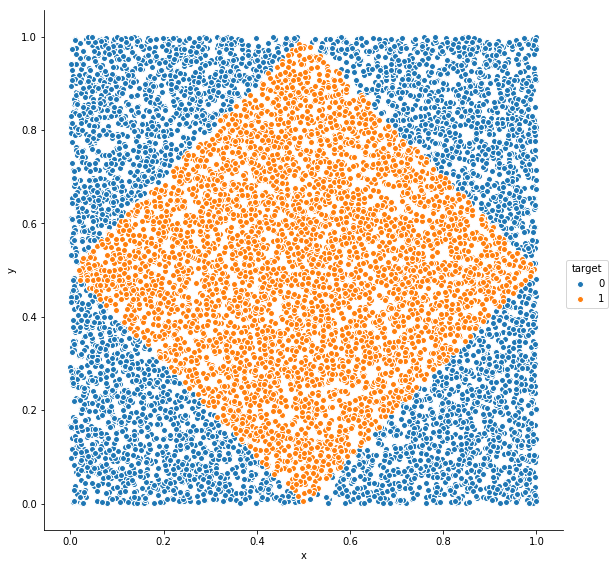

In [4]:
X_train = np.random.rand(10000, 2)
y_train = (np.sum(np.abs(X_train - [0.5, 0.5]), axis=1) < 0.5).astype(int)
data = pd.DataFrame(X_train, columns=["x", "y"])
data["target"] = y_train
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="target", size=8)

**********  RADIAL -- CUADRADO
Epoch 1/25
10000/10000 [==============================] - 8s 825us/step - loss: 0.6922 - acc: 0.5542
Epoch 2/25
10000/10000 [==============================] - 1s 110us/step - loss: 0.6837 - acc: 0.6823
Epoch 3/25
10000/10000 [==============================] - 1s 75us/step - loss: 0.6732 - acc: 0.7321
Epoch 4/25
10000/10000 [==============================] - 1s 74us/step - loss: 0.6593 - acc: 0.7946
Epoch 5/25
10000/10000 [==============================] - 1s 86us/step - loss: 0.6408 - acc: 0.8131
Epoch 6/25
10000/10000 [==============================] - ETA: 0s - loss: 0.6199 - acc: 0.853 - 1s 72us/step - loss: 0.6198 - acc: 0.8535
Epoch 7/25
10000/10000 [==============================] - 1s 72us/step - loss: 0.5962 - acc: 0.8867
Epoch 8/25
10000/10000 [==============================] - 1s 89us/step - loss: 0.5703 - acc: 0.9034
Epoch 9/25
10000/10000 [==============================] - 1s 68us/step - loss: 0.5428 - acc: 0.9115
Epoch 10/25
10000/10000 [====

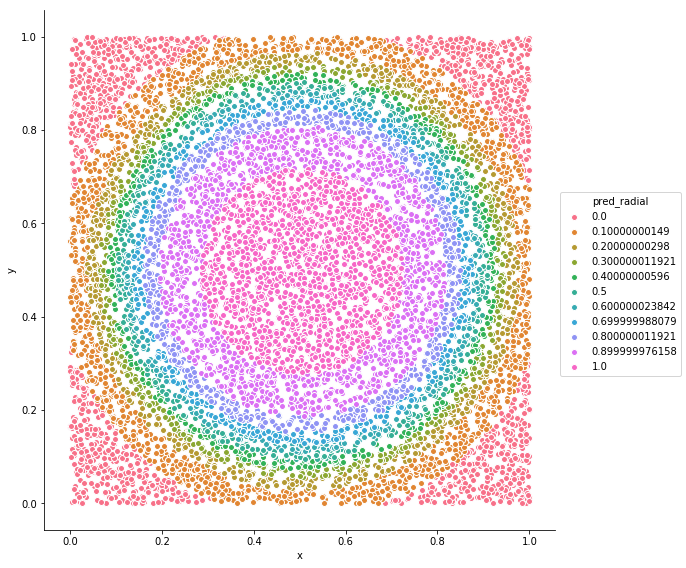

In [5]:
radial_model = Sequential([
    RBFLayer(5, input_shape=(2,)),
    Dense(1, activation="sigmoid")
])

radial_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " RADIAL -- CUADRADO")
radial_model.fit(X_train, y_train, epochs=25)
data["pred_radial"] = radial_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_radial", size=8)

**********  MLP 1-- CUADRADO
Epoch 1/25
10000/10000 [==============================] - 2s 184us/step - loss: 0.7025 - acc: 0.5092
Epoch 2/25
10000/10000 [==============================] - 1s 67us/step - loss: 0.6949 - acc: 0.4585
Epoch 3/25
10000/10000 [==============================] - 1s 60us/step - loss: 0.6917 - acc: 0.5217
Epoch 4/25
10000/10000 [==============================] - 1s 52us/step - loss: 0.6883 - acc: 0.5125
Epoch 5/25
10000/10000 [==============================] - 0s 48us/step - loss: 0.6837 - acc: 0.5665
Epoch 6/25
10000/10000 [==============================] - 1s 137us/step - loss: 0.6786 - acc: 0.5517
Epoch 7/25
10000/10000 [==============================] - 2s 150us/step - loss: 0.6725 - acc: 0.5612
Epoch 8/25
10000/10000 [==============================] - 2s 178us/step - loss: 0.6662 - acc: 0.5807
Epoch 9/25
10000/10000 [==============================] - 1s 122us/step - loss: 0.6591 - acc: 0.5882
Epoch 10/25
10000/10000 [==============================] - 1s 97us

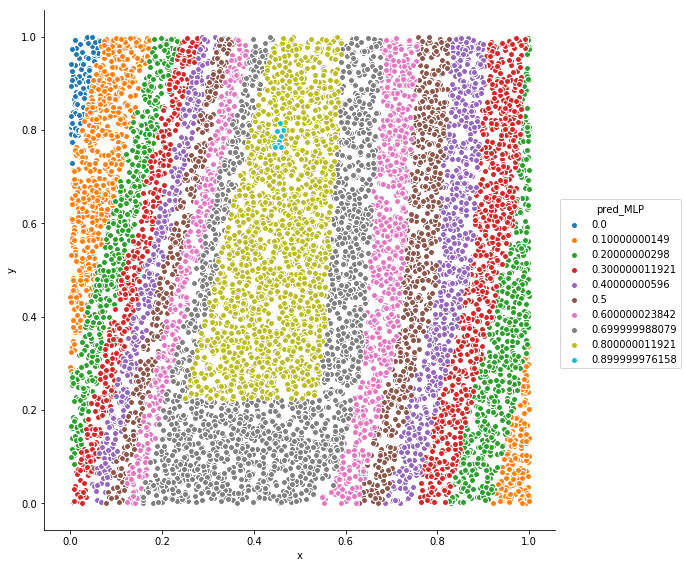

In [6]:
MLP_model = Sequential([
    Dense(5, input_shape=(2,), activation="relu"),
    Dense(1, activation="sigmoid")
])

MLP_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " MLP 1-- CUADRADO")
MLP_model.fit(X_train, y_train, epochs=25)
data["pred_MLP"] = MLP_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_MLP", size=8)

**********  MLP 2-- CUADRADO
Epoch 1/25
10000/10000 [==============================] - 3s 278us/step - loss: 0.6849 - acc: 0.6344
Epoch 2/25
10000/10000 [==============================] - 1s 128us/step - loss: 0.6687 - acc: 0.6879
Epoch 3/25
10000/10000 [==============================] - 1s 98us/step - loss: 0.6477 - acc: 0.6975
Epoch 4/25
10000/10000 [==============================] - 1s 73us/step - loss: 0.6234 - acc: 0.7097
Epoch 5/25
10000/10000 [==============================] - 1s 71us/step - loss: 0.5977 - acc: 0.7183
Epoch 6/25
10000/10000 [==============================] - 1s 85us/step - loss: 0.5654 - acc: 0.7314
Epoch 7/25
10000/10000 [==============================] - 1s 71us/step - loss: 0.5308 - acc: 0.7379
Epoch 8/25
10000/10000 [==============================] - 1s 51us/step - loss: 0.4944 - acc: 0.7641
Epoch 9/25
10000/10000 [==============================] - 1s 68us/step - loss: 0.4565 - acc: 0.8079
Epoch 10/25
10000/10000 [==============================] - 1s 64us/st

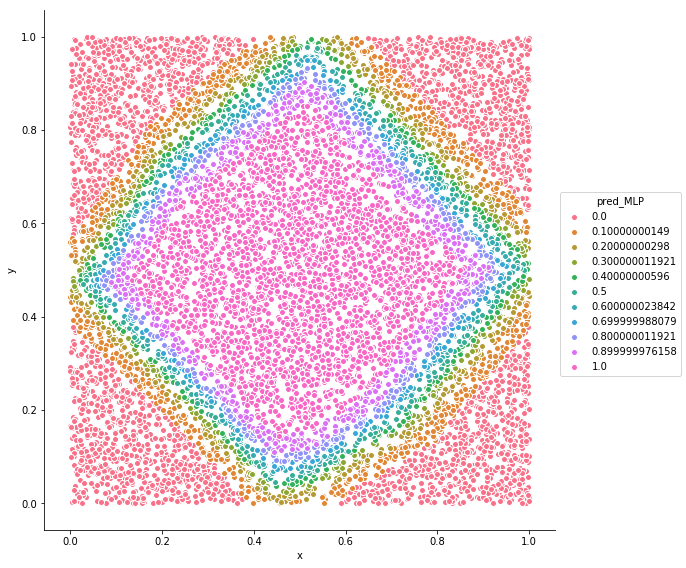

In [7]:
MLP_model = Sequential([
    Dense(10, input_shape=(2,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")
])

MLP_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " MLP 2-- CUADRADO")
MLP_model.fit(X_train, y_train, epochs=25)
data["pred_MLP"] = MLP_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_MLP", size=8)

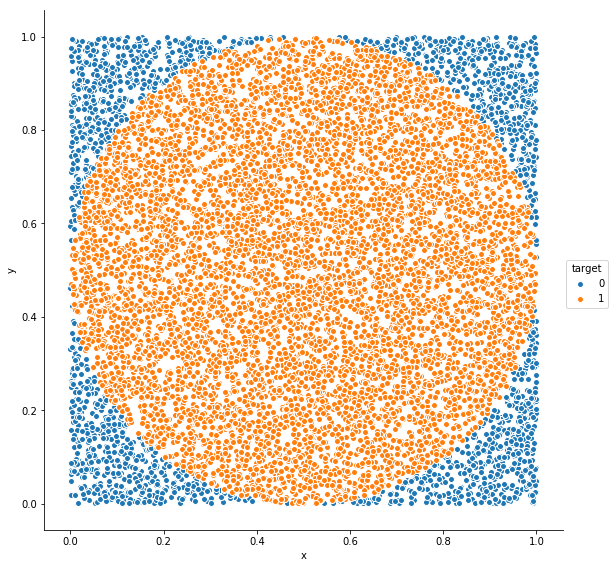

In [8]:
X_train = np.random.rand(10000, 2)
y_train = (np.power(np.sum(np.power(X_train - [0.5, 0.5], 2), axis=1), 0.5) < 0.5).astype(int)
data = pd.DataFrame(X_train, columns=["x", "y"])
data["target"] = y_train
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="target", size=8)

**********  RADIAL -- REDONDO
Epoch 1/50
10000/10000 [==============================] - 3s 280us/step - loss: 0.5791 - acc: 0.7874
Epoch 2/50
10000/10000 [==============================] - 2s 181us/step - loss: 0.5142 - acc: 0.7870
Epoch 3/50
10000/10000 [==============================] - 2s 191us/step - loss: 0.5053 - acc: 0.7870
Epoch 4/50
10000/10000 [==============================] - 1s 113us/step - loss: 0.4967 - acc: 0.7870
Epoch 5/50
10000/10000 [==============================] - 1s 124us/step - loss: 0.4862 - acc: 0.7870
Epoch 6/50
10000/10000 [==============================] - 1s 109us/step - loss: 0.4742 - acc: 0.7870
Epoch 7/50
10000/10000 [==============================] - 1s 93us/step - loss: 0.4599 - acc: 0.7884
Epoch 8/50
10000/10000 [==============================] - 1s 92us/step - loss: 0.4444 - acc: 0.7952
Epoch 9/50
10000/10000 [==============================] - 1s 90us/step - loss: 0.4297 - acc: 0.8042
Epoch 10/50
10000/10000 [==============================] - 1s 90

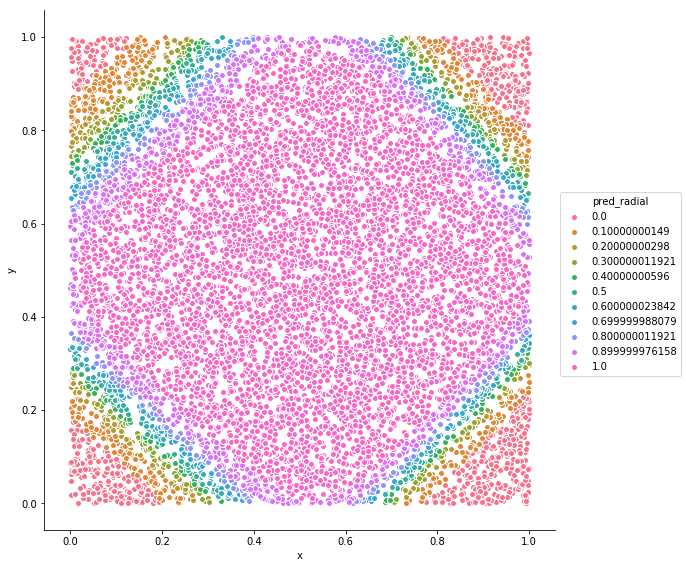

In [9]:
radial_model = Sequential([
    RBFLayer(5, input_shape=(2,)),
    Dense(1, activation="sigmoid")
])

radial_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " RADIAL -- REDONDO")
radial_model.fit(X_train, y_train, epochs=50)
data["pred_radial"] = radial_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_radial", size=8)

**********  MLP 2 -- REDONDO
Epoch 1/50
10000/10000 [==============================] - 2s 184us/step - loss: 0.5684 - acc: 0.7870
Epoch 2/50
10000/10000 [==============================] - 1s 118us/step - loss: 0.5167 - acc: 0.7870
Epoch 3/50
10000/10000 [==============================] - 2s 190us/step - loss: 0.5099 - acc: 0.7870
Epoch 4/50
10000/10000 [==============================] - 1s 124us/step - loss: 0.4965 - acc: 0.7870
Epoch 5/50
10000/10000 [==============================] - 1s 84us/step - loss: 0.4849 - acc: 0.7962
Epoch 6/50
10000/10000 [==============================] - 1s 70us/step - loss: 0.4729 - acc: 0.8069
Epoch 7/50
10000/10000 [==============================] - 1s 113us/step - loss: 0.4613 - acc: 0.8092
Epoch 8/50
10000/10000 [==============================] - 1s 129us/step - loss: 0.4494 - acc: 0.8077
Epoch 9/50
10000/10000 [==============================] - 1s 114us/step - loss: 0.4355 - acc: 0.8076
Epoch 10/50
10000/10000 [==============================] - 1s 12

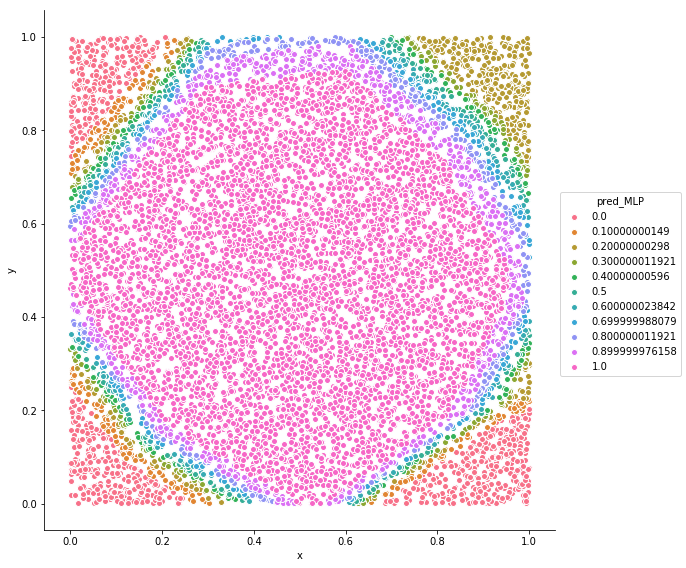

In [10]:
MLP_model = Sequential([
    Dense(10, input_shape=(2,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")
])

MLP_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("*" * 10, " MLP 2 -- REDONDO")
MLP_model.fit(X_train, y_train, epochs=50)
data["pred_MLP"] = MLP_model.predict(X_train).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_MLP", size=8)

**********  ENSAMBLE -- REDONDO
Epoch 1/50
10000/10000 [==============================] - 3s 291us/step - loss: 0.5493 - acc: 0.7747
Epoch 2/50
10000/10000 [==============================] - 2s 162us/step - loss: 0.4984 - acc: 0.7870
Epoch 3/50
10000/10000 [==============================] - 2s 203us/step - loss: 0.4737 - acc: 0.7872 0s - loss: 0.4741 - acc: 0.78
Epoch 4/50
10000/10000 [==============================] - 2s 155us/step - loss: 0.4460 - acc: 0.7980
Epoch 5/50
10000/10000 [==============================] - 1s 117us/step - loss: 0.4201 - acc: 0.8163
Epoch 6/50
10000/10000 [==============================] - 1s 99us/step - loss: 0.3972 - acc: 0.8295
Epoch 7/50
10000/10000 [==============================] - 1s 101us/step - loss: 0.3751 - acc: 0.8381
Epoch 8/50
10000/10000 [==============================] - 1s 99us/step - loss: 0.3525 - acc: 0.8442
Epoch 9/50
10000/10000 [==============================] - 1s 99us/step - loss: 0.3305 - acc: 0.8524
Epoch 10/50
10000/10000 [=======

[array([[-2.75008678],
        [-3.94794965],
        [-2.47829175],
        [-0.04572077],
        [ 4.1034627 ],
        [-3.76506376],
        [ 3.38416481],
        [ 2.89295721],
        [-3.24737978],
        [-2.92629528]], dtype=float32), array([ 0.16857228], dtype=float32)]

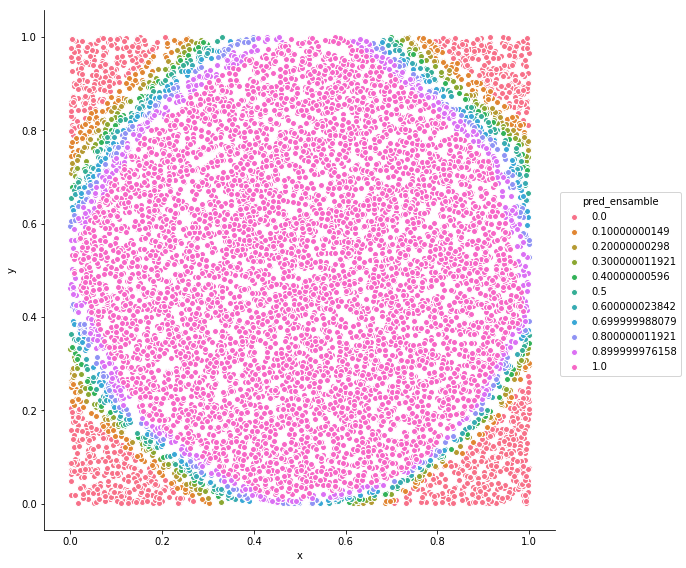

In [11]:
from keras.layers import Input, concatenate
from keras.models import Model

input1 = Input(shape=(2, ))
dense1 = RBFLayer(5)(input1)
input2 = Input(shape=(2, ))
dense2 = Dense(10, activation='relu')(input2)
dense2 = Dense(5, activation='relu')(dense2)
merged = concatenate([dense1, dense2])
out = Dense(1, activation='sigmoid', name='output_layer')(merged)
ensamble = Model(inputs = [input1, input2], outputs = [out])
ensamble.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
print("*" * 10, " ENSAMBLE -- REDONDO")
ensamble.fit([X_train, X_train], y_train, epochs=50)
data["pred_ensamble"] = ensamble.predict([X_train, X_train]).round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="pred_ensamble", size=8)
ensamble.layers[-1].get_weights()

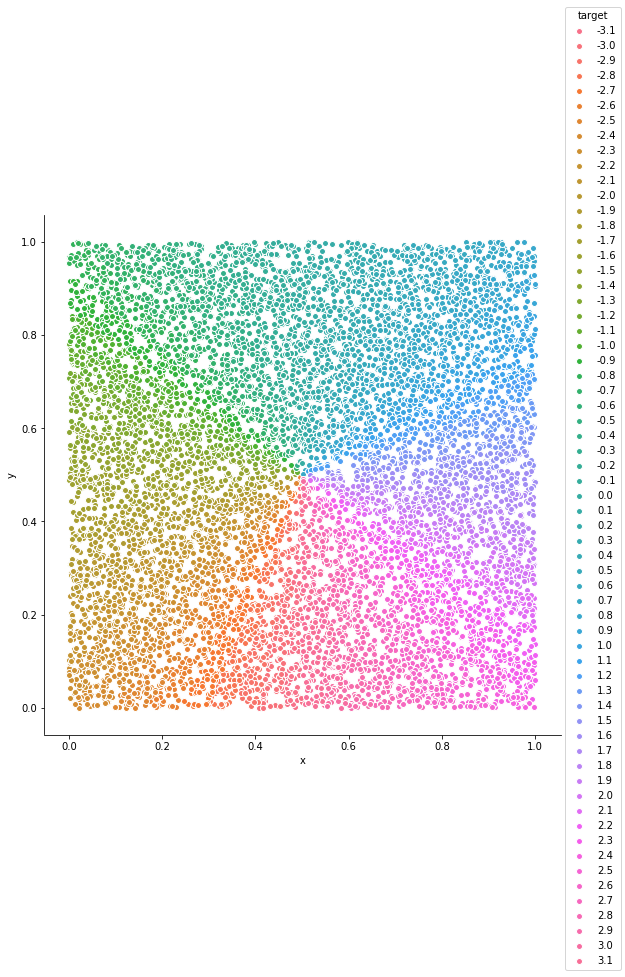

In [12]:
X_train = np.random.rand(10000, 2)
y_train = np.arctan2(X_train[:, 0] - 0.5, X_train[:, 1] - 0.5)
data = pd.DataFrame(X_train, columns=["x", "y"])
data["target"] = y_train.round(1)
sns.pairplot(x_vars=["x"], y_vars=["y"], data=data, hue="target", size=8)